In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_tragets) = boston_housing.load_data()
# traindata是样本数据，每个房子都有13项特征值，代表人均犯罪率，平均房间数等
print(train_data.shape)
print(test_data.shape)
# target是房价，单位是千美元
print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

In [5]:
# 取值范围比较大，所以需要对特征值做标准化，
#计算训练数据集的均值 mean，即每列特征的平均值。
#将训练数据集的每个特征都减去对应的均值 mean，以确保每个特征的平均值为0。
#计算训练数据集的标准差 std，即每列特征的标准差。
#将训练数据集的每个特征都除以对应的标准差 std，以确保每个特征的标准差为1。
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std
train_data


array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [7]:
from keras import models
from keras import layers


# 模型需要多次实例化，所以抽取为函数
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # 损失函数为mse，均方误差， 预测值和目标值之差的平方
    # 衡量mae为平均绝对误差，预测值和目标值之差的绝对值

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
import numpy as np

k = 4  # 分区数
num_val_samples = len(train_data) // k  # 每个分区的数据个数
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing flod #', i)
    # 将第一个分区的数据作为validation
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
                                        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

all_scores
np.mean(all_scores)

processing flod # 0


2023-04-26 18:10:47.117485: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


processing flod # 1
processing flod # 2
processing flod # 3


[1.8329646587371826, 3.046855926513672, 2.9368369579315186, 2.17476487159729]

In [26]:
k = 4  # 分区数
num_val_samples = len(train_data) // k  # 每个分区的数据个数
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
                                        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    all_mae_histories.append(history)


KeyboardInterrupt: 

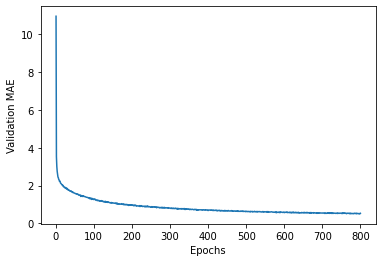

In [20]:
average_mae_history=[np.mean([x.history['mae'][i] for x in all_mae_histories]) for i in range(num_epochs)]
# average_mae_history = average_mae_history[20:]
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

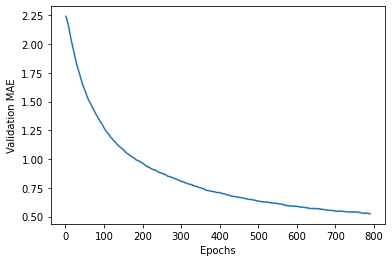

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous * factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose= 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_tragets)
test_mae_score

4/4 [==============================] - 0s 1ms/step - loss: 17.2815 - mae: 2.5579


2.557893753051758